In [241]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [242]:
dir_path='./'
dirr='dataset/'
result_path=dir_path+dirr+'results/'
image='test3'
formatt='.jpg'

(540, 960, 3)


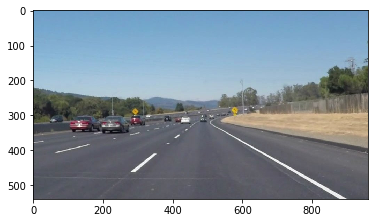

In [243]:
img=cv2.imread(dir_path+dirr+image+formatt)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imsave(result_path+'['+str(image)+']'+'.jpg',img)
plt.imshow(img)
print(img.shape)
img2=img

In [244]:
def convert_to_HSV(image):
    img=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    plt.imshow(img)
    print(img.shape)
    return img

In [245]:
def roi(img, vertices): 
    mask = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [246]:
def Hough_transform(image,threshold):
    theta_acc=np.deg2rad(np.linspace(0,360,360))
    theta_acc_len=len(theta_acc)
    w, h = image.shape
    diag_len = int(np.ceil(np.sqrt(w**2 + h**2)))
    roh_acc=np.ceil(np.linspace(-diag_len,diag_len,2*diag_len))
    roh_acc_len=len(roh_acc)
    accumulator=np.zeros((roh_acc_len,theta_acc_len), dtype=np.uint8)
    ROI_y, ROI_x = np.where(image!=0)

    for i in range(len(ROI_x)):
        x = ROI_x[i]
        y = ROI_y[i]
        for i in range(theta_acc_len):
            rho = diag_len + int(round(x * np.cos(theta_acc[i]) + y * np.sin(theta_acc[i])))
            accumulator[rho, i] += 1
    hough_out = []
    max_r,max_c=np.where(accumulator>=threshold)
    for i in range(len(max_r)):
        x=max_r[i]
        y=max_c[i]
        rho = roh_acc[x]
        theta = theta_acc[y] 
        x = math.cos(theta) * rho
        y = math.sin(theta) * rho
        co_ordinates1 = (int(x + (-math.sin(theta))), int(y + (math.cos(theta))))
        co_ordinates2= (int(x - 1000*(-math.sin(theta))), int(y - 1000*(math.cos(theta))))

        hough_out.append((*co_ordinates1, *co_ordinates2))
    return hough_out

In [247]:
# #Binary mask
binary_mask=np.ones((img.shape[0],img.shape[1]))
binary_mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [248]:
def Binary_mask(image):
    lower_white = np.array([0,0,168])
    upper_white = np.array([142,75,255])
    lower_yellow = (12, 90, 90)
    upper_yellow = (40, 255, 255)
    binary_mask_white=cv2.inRange(image,lower_white,upper_white)
    fig=plt.figure(figsize=(10,10))
    plt.imshow(binary_mask_white,cmap='gray')
    plt.title('White Binary mask')
    binary_mask_yellow=cv2.inRange(image,lower_yellow,upper_yellow)
    fig=plt.figure(figsize=(10,10))
    plt.imshow(binary_mask_yellow,cmap='gray')
    plt.title('Yellow Binary mask')
    binary_mask=cv2.bitwise_or(binary_mask_white,binary_mask_yellow)
    fig=plt.figure(figsize=(10,10))
    plt.imshow(binary_mask,cmap='gray')
    plt.title('Binary Mask')
    res_y = cv2.bitwise_and(image,image, mask= binary_mask_yellow)
    res_w = cv2.bitwise_and(image,image, mask=binary_mask_white)
    res=cv2.bitwise_or(res_w,res_y)
    fig=plt.figure(figsize=(10,10))
    plt.imshow(res,cmap='gray')
    plt.title('Filtered Image')
    return res,binary_mask

In [249]:
def Gaussian_filter(image,kernal_size):
    gaussian_filter=np.ones((kernal_size,kernal_size),np.float32)/25
    img_after_gaussian=cv2.filter2D(src=image,kernel=gaussian_filter,ddepth=-1)
    plt.imshow(img_after_gaussian)
    return img_after_gaussian

(540, 960, 3)


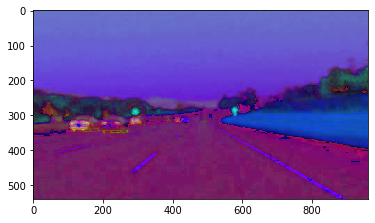

In [250]:
imagee=convert_to_HSV(img)

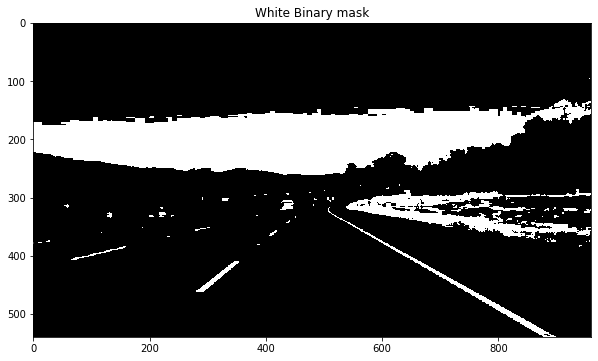

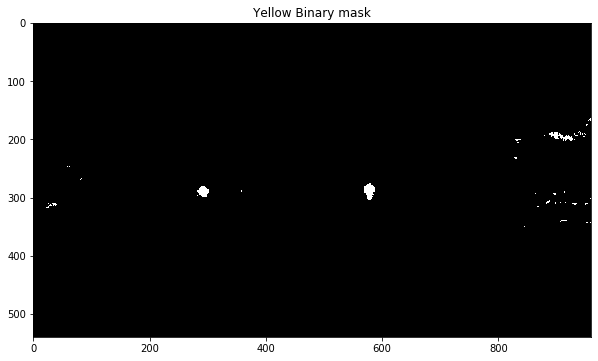

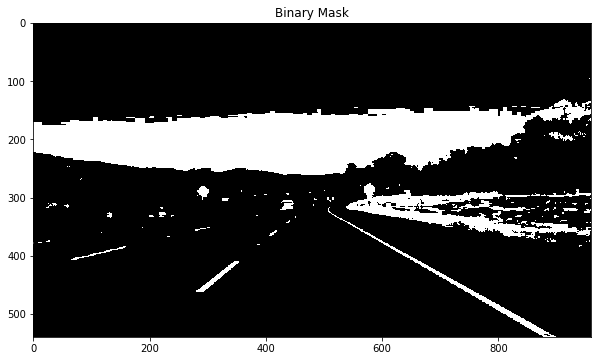

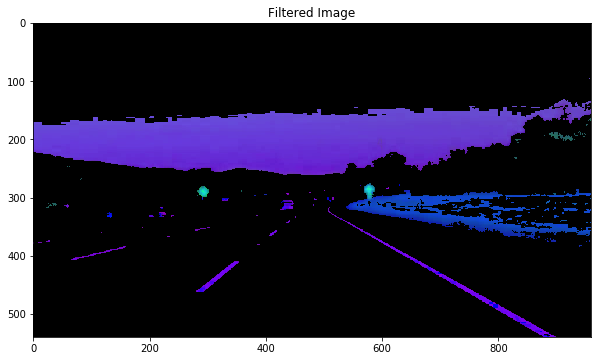

In [251]:
filtered_image,binary_mask=Binary_mask(imagee)
plt.imsave(result_path+str(image)+'_'+'BinaryMask'+'.jpg',binary_mask,cmap='gray')
plt.imsave(result_path+str(image)+'_'+'FilteredImage'+'.jpg',filtered_image)
gray_img=cv2.cvtColor(filtered_image,cv2.COLOR_RGB2GRAY)
plt.imsave(result_path+str(image)+'_'+'FilteredImage_gray'+'.jpg',gray_img,cmap='gray')

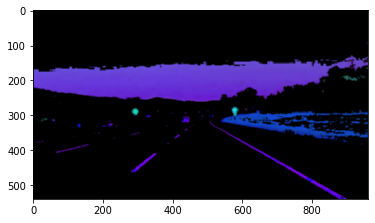

In [252]:
gauss_image=Gaussian_filter(filtered_image,kernal_size=5)

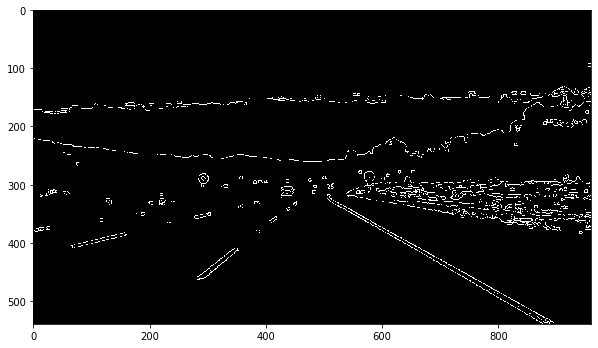

In [253]:
threshold1=20
threshold2=50
edges = cv2.Canny(gauss_image,threshold1,threshold2)
fig=plt.figure(figsize=(10,10))
plt.imshow(edges,cmap='gray')

Text(0.5, 1.0, 'ROI')

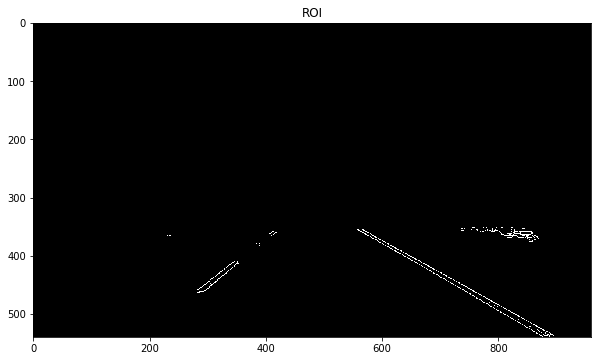

In [254]:
vertices=np.array([[[200,360],[850,350],[1000,500],[1000,649],[0,649],[0,500]]],np.int32)
ROI=roi(edges,vertices)
plt.imsave(result_path+str(image)+'_'+'roi'+'.jpg',ROI,cmap='gray')
fig=plt.figure(figsize=(10,10))
plt.imshow(ROI,cmap='gray')
plt.title('ROI')


In [255]:
hough_out=Hough_transform(ROI,threshold=70)

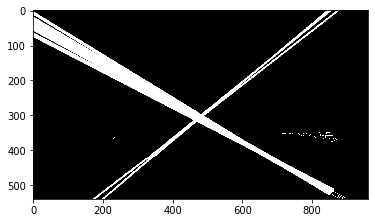

In [256]:
for out in hough_out[:]: 
    cv2.line(ROI, (out[0], out[1]), (out[2], out[3]), (255,0,0), 3, cv2.LINE_AA)
plt.imshow(ROI,cmap='gray')
plt.show()

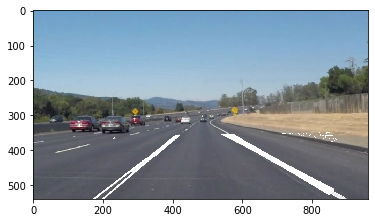

In [257]:
out1=roi(ROI,vertices)
out2=cv2.cvtColor(out1,cv2.COLOR_GRAY2RGB)
output=cv2.bitwise_or(img2,out2)
plt.imsave(result_path+str(image)+'_'+'Output'+'.jpg',output)
plt.imshow(output)
plt.show()